# 01 Creation of the first bell state

This notebooks illustrates basics of how to write quantum algorithms using Qiskit. We are going to create a bell state or an ERP pair ; two qubits are maximally entangled 

In [3]:
from qiskit import QuantumCircuit

In [13]:
qiskit.__version__

'1.1.1'

In [14]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum", # ibm_cloud 
                               token = 'YOURTOKENHERE')

## First Step : Define a circuit

To create the bell state, we need two qubits. In addition, we will store the result of the circuit execution in a classical bit

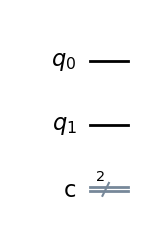

In [4]:
qc = QuantumCircuit(2,2) #create a quantum circuit with two quibit and two classical bit
qc.draw('mpl') #visualize the circuit

## Second Step : Applying gates

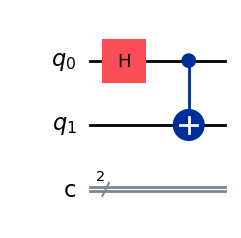

In [5]:
qc.h(0)
qc.cx(0, 1)
qc.draw("mpl")


## Thrid Step : 

In [6]:
print("Number of qubits: ", qc.num_qubits)
print("Number of classical bits: ", qc.num_clbits)
print("Circuit depth: ", qc.depth())

Number of qubits:  2
Number of classical bits:  2
Circuit depth:  2


In [7]:
from qiskit_aer import StatevectorSimulator

simulator_aerlegacy = StatevectorSimulator()
result_aerlegacy = simulator_aerlegacy.run(qc).result()

In [10]:
psi = result_aerlegacy.get_statevector()

In [11]:
display(psi.draw(output='latex'))

<IPython.core.display.Latex object>

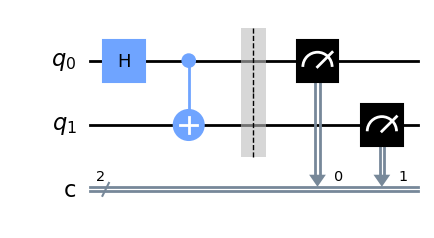

In [12]:
import qiskit 
from qiskit import transpile
from qiskit_aer import AerSimulator

# Construct an ideal simulator
simulator = AerSimulator()
qc.measure_all(add_bits=False)
qc.draw('mpl',style='clifford')


In [7]:
compiled_circuit_2 = transpile(qc)
sim_result_2 = simulator.run(compiled_circuit_2, simulator=1024).result()

In [8]:
counts = sim_result_2.get_counts()

In [9]:
experiment = sim_result_2._get_experiment()

for sample in counts:
    print(f"Measurement: {sample}, Hits: {counts[sample]}, Probability: {counts[sample]/experiment.shots}")

Measurement: 00, Hits: 507, Probability: 0.4951171875
Measurement: 11, Hits: 517, Probability: 0.5048828125


In [12]:
sim_result_2

Result(backend_name='aer_simulator_statevector', backend_version='0.14.2', qobj_id='', job_id='d2e399fd-ae71-4672-bdd1-087f346932b8', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 507, '0x3': 517}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-160', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=1883384392, metadata={'batched_shots_optimization': False, 'required_memory_mb': 1, 'method': 'statevector', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0033323, 'sample_measure_time': 0.0013139, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 16236, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 16, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': True, 'threshold': 14, 'max_fused_qu

In [8]:
from qiskit_aer import StatevectorSimulator

simulator_aerlegacy = StatevectorSimulator()
result_aerlegacy = simulator_aerlegacy.run(qc).result()

In [9]:
result_aerlegacy.data()

{'counts': {'0x0': 1},
 'statevector': Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
              0.70710678+0.j],
             dims=(2, 2))}